### Heroes Of Pymoli Data Analysis

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [150]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [125]:
purchase_data.head(5)

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [126]:
#complete data of players in CSV
players = purchase_data["SN"].count()
print(players)

#to find accurate total number of players we have to use value_counts method. it helps us to show no. of purchases made by each player so it helps us to count the player once instead of counting multiple times  
players = len(purchase_data["SN"].value_counts())
print(players)


780
576


In [127]:
#Converting to dataframe 
players_df = pd.DataFrame({"Total players": [players]})
players_df

,Total players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [128]:
#Total number of unique iteams
unique_items = len(purchase_data["Item Name"].value_counts())
#Average price 
average_price = purchase_data["Price"].mean()
#Total Number of Purchases
number_of_purchases = purchase_data["Purchase ID"].count()
#Total Revenue
total_revenue = purchase_data["Price"].sum()

#summary data
summary_data = {"number of unique iteams":[unique_items], "average price":[average_price], "Number of purchases":[number_of_purchases],"Total Revenue":[total_revenue]}
#summary data frame
summary_dataframe = pd.DataFrame(summary_data)

In [129]:
summary_dataframe

,number of unique iteams,average price,Number of purchases,Total Revenue
0,179,3.050987,780,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [130]:
gender = purchase_data.groupby(["Gender"])
gender_count = purchase_data["Gender"].count()
gender_count
#Count of male players 
male_players_count = len(purchase_data[purchase_data["Gender"] == "Male"])
#Count of female players
female_players_count = len(purchase_data[purchase_data["Gender"] == "Female"])
#Count of Other / Non-Disclosed
nondisclosed_players_count = len(purchase_data[purchase_data["Gender"] == "Other / Non-Disclosed"])

#Percentage of male players 
male_players_percentage = male_players_count/gender_count * 100
##Percentage of female players
female_players_percentage = female_players_count/gender_count * 100
#Percentage of Other / Non-Disclosed players
nondisclosed_players_percentage = nondisclosed_players_count/gender_count * 100

gender_data_df = pd.DataFrame(
[[male_players_count, male_players_percentage],
[female_players_count, female_players_percentage],
[nondisclosed_players_count, nondisclosed_players_percentage]],
index=["Male","Female", "Other / Non-Disclosed"],
columns=["Total Count", "Percentage of Players"])
gender_data_df

,Total Count,Percentage of Players
Male,652,83.589744
Female,113,14.487179
Other / Non-Disclosed,15,1.923077



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [131]:
#Purchase count
male_purchase_count = len(purchase_data[purchase_data["Gender"] == "Male"])
female_purchase_count = len(purchase_data[purchase_data["Gender"] == "Female"])
nondisclosed_purchase_count = len(purchase_data[purchase_data["Gender"] == "Other / Non-Disclosed"])

#Average purchase price 
male_average_prchase = purchase_data.loc[purchase_data["Gender"] == "Male", "Price"].mean()
female_average_prchase = purchase_data.loc[purchase_data["Gender"] == "Female", "Price"].mean()
nondisclosed_average_prchase = purchase_data.loc[purchase_data["Gender"] == "Other / Non-Disclosed", "Price"].mean()

#Total purchase value 
male_total_purchase = purchase_data.loc[purchase_data["Gender"] == "Male", "Price"].sum()
female_total_purchase = purchase_data.loc[purchase_data["Gender"] == "Female", "Price"].sum()
nondisclosed_total_purchase = purchase_data.loc[purchase_data["Gender"] == "Other / Non-Disclosed", "Price"].sum()

#Avg total purchase per person 
male_avg_total_purchase = male_total_purchase / male_players_count
female_avg_total_purchase = female_total_purchase / female_players_count
nondisclosed_avg_total_purchase = nondisclosed_total_purchase / nondisclosed_players_count


summary_dataframe = pd.DataFrame(
[[male_purchase_count, male_average_prchase, male_total_purchase, male_avg_total_purchase],
[female_purchase_count, female_average_prchase, female_total_purchase, female_avg_total_purchase],
[nondisclosed_purchase_count, nondisclosed_average_prchase, nondisclosed_total_purchase, nondisclosed_avg_total_purchase]],
index=["Male","Female", "Other / Non-Disclosed"],
columns=["Purchase count", "Average purchase price", "Total purchase value", "Avg total purchase per person "])

summary_dataframe

,Purchase count,Average purchase price,Total purchase value,Avg total purchase per person
Male,652,3.017853,1967.64,3.017853
Female,113,3.203009,361.94,3.203009
Other / Non-Disclosed,15,3.346000,50.19,3.346000


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [154]:
age_bins = [0, 9, 14, 19, 24, 29, 34, 39, 46]
groups_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]


purchase_data["Age Group"] = pd.cut(purchase_data["Age"], bins=age_bins, labels=groups_names)
purchase_data


age_group = purchase_data.groupby("Age Group")

#Total Players by Age 
total_count_age = age_group["SN"].nunique()

#Percentages by Age 
percentage_by_age = total_count_age / players * 100

#Summary DataFrame
summary_dataframe = pd.DataFrame({"Total Count": total_count_age, "Percentage of Players": percentage_by_age})

summary_dataframe

,Total Count,Percentage of Players
Age Group,,
<10,17,2.951389
10-14,22,3.819444
15-19,107,18.576389
20-24,258,44.791667
25-29,77,13.368056
30-34,52,9.027778
35-39,31,5.381944
40+,12,2.083333


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [158]:
age_bins = [0, 9, 14, 19, 24, 29, 34, 39, 46]
groups_names = ["10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+", "<10"]

purchase_data["Age Group"] = pd.cut(purchase_data["Age"], bins=age_bins, labels=groups_names)

#purchase count
purchase_count = age_group["SN"].count()

#Average Purchase Price
avg_purchase_price = age_group["Price"].mean()

#Total Purchase Value
total_purchase_value = age_group["Price"].sum()

#Avg Total Purchase per Person
avg_total_purchase_person = total_age_purchase_value / total_count_age

#summary dataframe
summary_dataframe = pd.DataFrame({"Purchase Count": purchase_count, "Average Purchase Price": avg_purchase_price, 
                                  "Total Purchase Value": total_purchase_value, "Avg Total Purchase per Person": avg_total_purchase_person})

summary_dataframe

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Group,,,,
<10,23,3.353478,77.13,4.537059
10-14,28,2.956429,82.78,3.762727
15-19,136,3.035956,412.89,3.858785
20-24,365,3.052219,1114.06,4.318062
25-29,101,2.900990,293.00,3.805195
30-34,73,2.931507,214.00,4.115385
35-39,41,3.601707,147.67,4.763548
40+,13,2.941538,38.24,3.186667


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [160]:
top_spenders = purchase_data.groupby("SN")

#Purchase Count
spender_purchase_count = top_spenders["Purchase ID"].count()

#Average Purchase Price
average_spender_purchase_price = top_spenders["Price"].mean()

#Total Purchase Value
total_spender_purchase_value = top_spenders["Price"].sum()

summary_dataframe = pd.DataFrame({"Purchase Count":spender_purchase_count, "Average Purchase Price":average_spender_purchase_price,
                                 "Total Purchase Value": total_spender_purchase_value})


top_spenders = summary_dataframe.sort_values(["Total Purchase Value"], ascending=False).head(5)
top_spenders

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [165]:
popular_items = purchase_data[["Item ID", "Item Name", "Price"]]

#Group by Item ID and Item Name
popular_items = popular_items.groupby(["Item ID","Item Name"])

#Purchase Count
item_purchase_count = popular_items["Price"].count()

#Item Price
item_price = popular_items["Price"].sum()

#Total Purchase Value
item_purchase_value = item_price / item_purchase_count

#summary DataFrame
summary_dataframe = pd.DataFrame({"Purchase Count": item_purchase_count, "Item Price": item_purchase_value,
   "Total Purchase Value": item_price})
sorted_summary_dataframe = summary_dataframe.sort_values(["Purchase Count"], ascending=False).head(5)
sorted_summary_dataframe

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [164]:
sorted_summary_dataframe = summary_dataframe.sort_values(["Total Purchase Value"], ascending=False).head(5)
sorted_summary_dataframe

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


# Data manipulation with pandas 

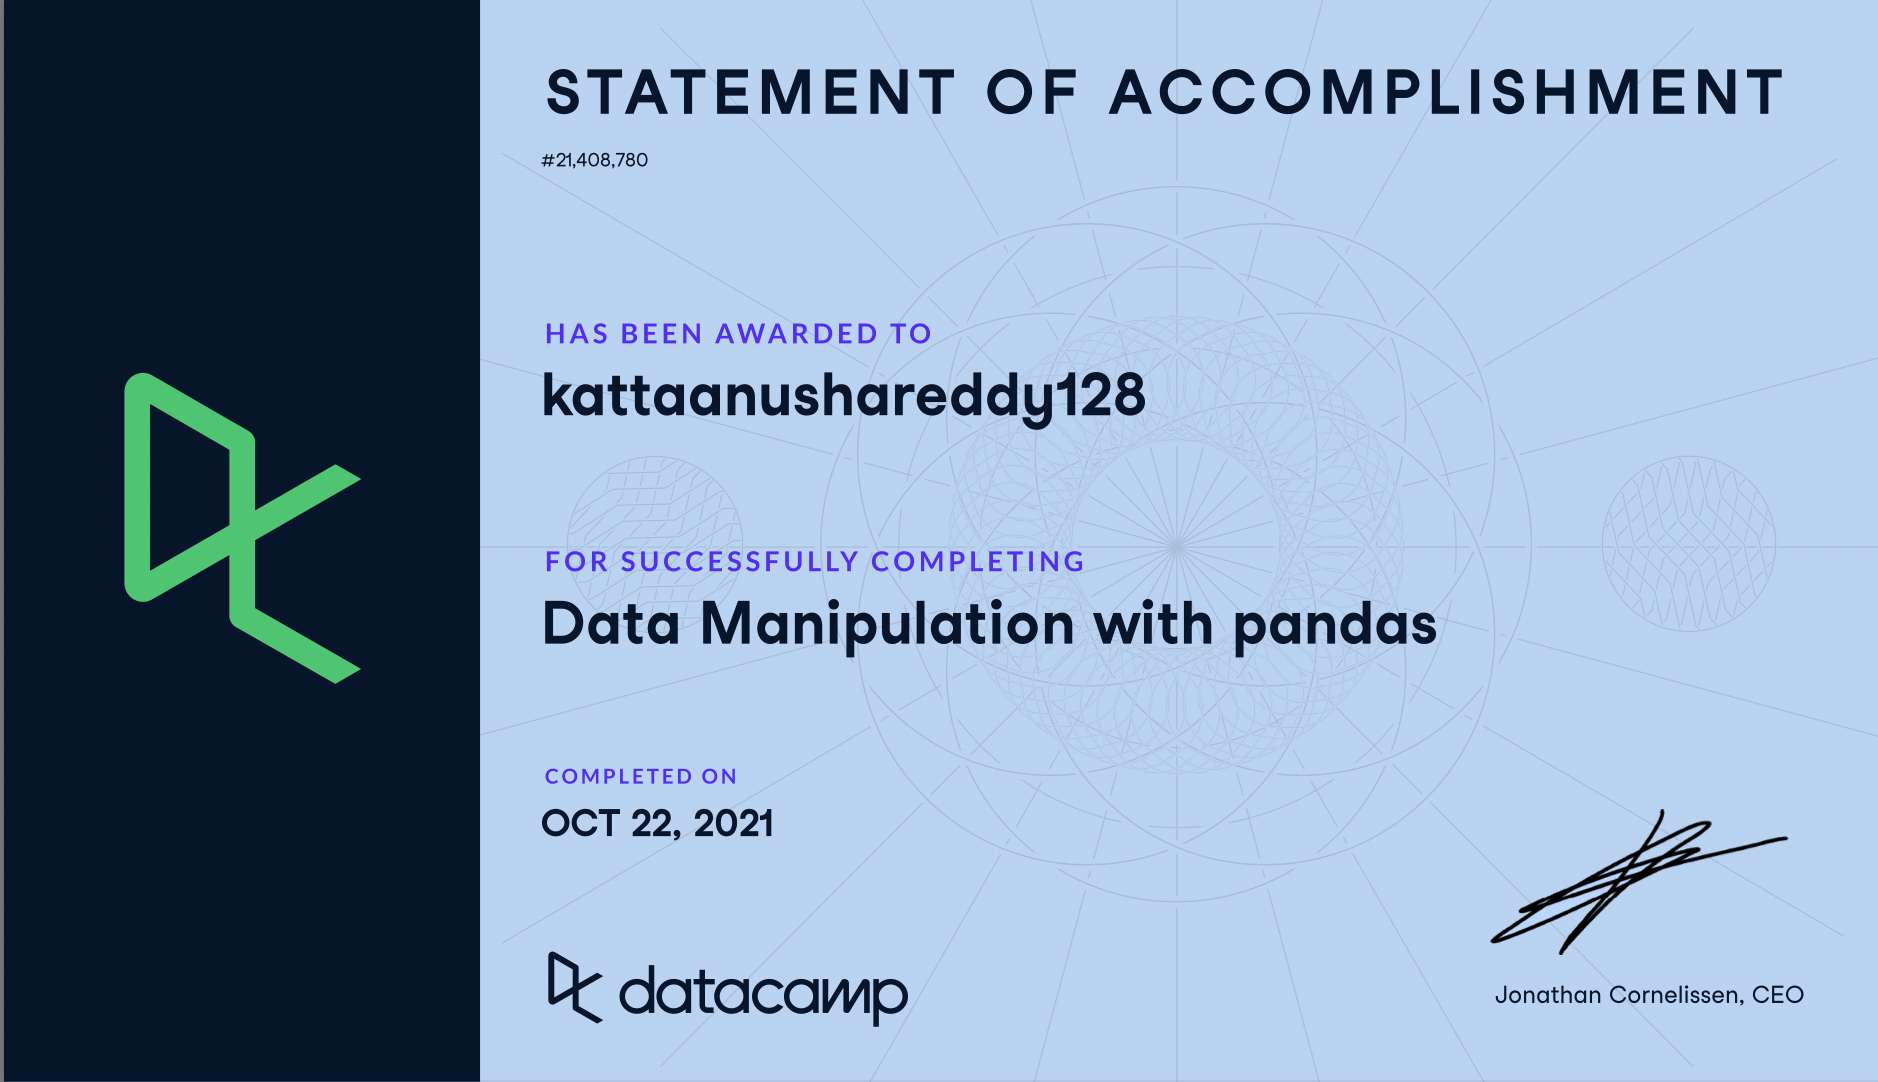